## Import dataset

In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
from ml import *

In [2]:
IMG_SIZE = (64, 64)
PATH = os.path.join("data_large/")
TRAIN = os.path.join(PATH, "train")
classes = os.listdir(TRAIN)

In [3]:
classes

['moulin-rouge',
 'palais-de-l-elysee',
 'pont-neuf',
 'place-de-la-concorde',
 'jardin-des-tuileries',
 'hotel-de-ville',
 'arc-de-triomphe',
 'musee-d-orsay']

In [4]:
def import_images_and_assign_labels(folder, label, X, Y):
    for file in os.listdir(folder):
        image_path = os.path.join(folder, file)
        im = Image.open(image_path)
        im = im.resize(IMG_SIZE)
        im = im.convert("RGB")
        im_arr = np.array(im)
        im_arr = np.reshape(im_arr, (IMG_SIZE[0]* IMG_SIZE[1] * 3,))
        X.append(im_arr)
        Y.append(label)

In [5]:
len(os.listdir(os.path.join(PATH, "train", "pont-neuf")))

487

In [6]:
def import_dataset():
    X_train, y_train, X_valid, y_valid = [], [], [], []
    labels = np.identity(len(os.listdir(TRAIN)))        
    for set_type in ["train", "valid"]:
        for cl, lab in zip(classes, labels):
            if set_type == "train":
                X_set, y_set = X_train, y_train
            else:
                X_set, y_set = X_valid, y_valid
            import_images_and_assign_labels(
                os.path.join(PATH, set_type, cl),
                lab,
                X_set,
                y_set
            )                
    
    return (np.array(X_train) / 255.0, np.array(y_train)), \
           (np.array(X_valid) / 255.0, np.array(y_valid))

In [7]:
(X_train, y_train), (X_valid, y_valid) = import_dataset()

In [8]:
def showImg(tensor, label, prediction):
    fig, ax = plt.subplots()
    ax.imshow(tensor.reshape((IMG_SIZE[0], IMG_SIZE[1], 3)))
    ax.set_title(f'Label: {classes[np.argmax(label)]}')
    ax.set_xlabel(f'Prediction: {np.argmax(prediction)} / Expected output: {np.argmax(label)}')
    ax.set_xticks([])
    ax.set_yticks([]);
    return ax

## Linear

In [9]:
input_dim = len(X_train[0])

In [10]:
p_model = create_linear_model(input_dim)

In [11]:
picture_test = np.random.randint(0, len(X_train))
test_before = predict_linear_model_classif(p_model, input_dim, X_train[picture_test])
print("Before training:", test_before)

Before training: 1.0


In [12]:
train_linear_classification_model(p_model, input_dim, X_train, y_train.flatten())

In [13]:
test_after = predict_linear_model_classif(p_model, input_dim, X_train[picture_test])
print("After training:", test_after)

After training: -1.0


In [14]:
destroy_linear_model(p_model)

## MLP (Classique)

In [15]:
input_dim = [len(X_train[0]), 32, 8]

In [16]:
p_model, len_output_layer = create_mlp_model(input_dim)

In [17]:
def accuracy(X, Y, model=p_model, len_output_layer=len_output_layer):
    true_preds = 0
    total_preds = len(X)
    for x, y in zip(X, Y):
        if np.argmax(predict_mlp_model_classification(model, x, len_output_layer)) == np.argmax(y):
            true_preds += 1
    print(f"Accuracy: {round((true_preds / total_preds) * 100, 2)}%")

In [18]:
picture_test = np.random.randint(0, len(X_valid)-1)

In [19]:
test_before = predict_mlp_model_classification(p_model, X_valid[picture_test], len_output_layer)
print("Before training:", test_before)

Before training: [0.9999896, 0.58330935, 0.9942315, 0.9990622, 0.35658413, -0.99259573, 0.98058885, 0.8140469]


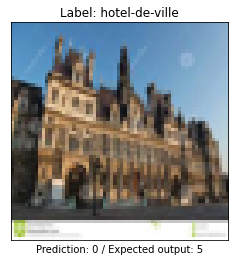

In [20]:
showImg(X_valid[picture_test], y_valid[picture_test], test_before);

In [21]:
accuracy(X_train[:150], y_train[:150])

Accuracy: 41.33%


In [22]:
accuracy(X_valid[:150], y_valid[:150])

Accuracy: 37.33%


In [23]:
train_classification_stochastic_gradient_backpropagation_mlp_model(p_model, X_train, y_train.flatten(), epochs=10000)#, alpha=0.01)

In [24]:
test_after = predict_mlp_model_classification(p_model, X_valid[picture_test], len_output_layer)

print("After training:", test_after)
print("Class index : ", np.argmax(test_after))
print("Class expected :", np.argmax(y_train[picture_test]))

After training: [0.03174454, 0.17628011, 0.046879683, 0.9999521, 0.10234659, 0.11331837, 0.18816318, 0.10785432]
Class index :  3
Class expected : 1


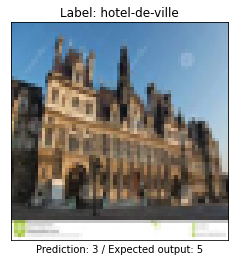

In [25]:
showImg(X_valid[picture_test], y_valid[picture_test], test_after);

In [ ]:
accuracy(X_train[:150], y_train[:150])

In [ ]:
accuracy(X_valid[:150], y_valid[:150])

In [ ]:
destroy_mlp_model(p_model)

## MLP - Discover new architectures